In [1]:
import torch
import neuralop
from neuralop.models import FNO
from neuralop.utils import count_model_params

device = 'cpu'
model = FNO(n_modes=(16, 16), hidden_channels=32,
                in_channels=3, out_channels=1)

model = model.to(device)
n_params = count_model_params(model)
print(f'\nOur model has {n_params} parameters.')

/Users/asitdas/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(



Our model has 1201825 parameters.


In [2]:
# import pkgutil
# for module_info in pkgutil.iter_modules(neuralop.tests.__path__):
#     print(module_info.name)


from neuralop.datasets import load_darcy_flow_small
train_loader, test_loaders, data_processor = load_darcy_flow_small(
     n_train=1000, batch_size=32,
     test_resolutions=[16, 32], n_tests=[100, 50],
     test_batch_sizes=[32, 32]
)

data_processor = data_processor.to(device)

# debug
# print(data_processor)
# debug

darcy path:/Users/asitdas/Library/Python/3.9/lib/python/site-packages/neuralop/datasets/data
Loading test db at resolution 32 with 50 samples and batch-size=32


In [3]:
torch.load("/Users/asitdas/Library/Python/3.9/lib/python/site-packages/neuralop/datasets/data/darcy_train_16.pt")

{'x': tensor([[[ True,  True,  True,  ...,  True,  True, False],
          [ True,  True,  True,  ...,  True, False, False],
          [ True,  True,  True,  ...,  True,  True, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]],
 
         [[ True,  True,  True,  ...,  True,  True,  True],
          [ True,  True,  True,  ...,  True,  True,  True],
          [False,  True,  True,  ...,  True,  True,  True],
          ...,
          [ True,  True,  True,  ..., False, False,  True],
          [ True,  True,  True,  ...,  True,  True,  True],
          [ True,  True, False,  ...,  True,  True,  True]],
 
         [[ True,  True,  True,  ..., False, False, False],
          [ True,  True,  True,  ..., False, False, False],
          [ True,  True,  True,  ..., False, False, False],
          ...,
          [ True,  True,  True,  ..., False,

In [3]:
from neuralop.training import Trainer

# Create the trainer
trainer = Trainer(model=model, n_epochs=20,
                  data_processor=data_processor,
                  verbose=True)

# train the model
trainer.train(train_loader=train_loader,
           test_loaders=test_loaders,
           optimizer=torch.optim.SGD(model.parameters(), lr=0.01),
           scheduler=torch.optim.SGD(model.parameters(), lr=0.01),
           regularizer=False,
           training_loss=None,
           eval_losses=None)

self.override_load_to_device=False
self.overrides_loss=False


{'32_l2': 0.40205324172973633}

/var/folders/qb/3cvhmjqj30q18hw487v4s64r0000gn/T/ipykernel_16190/970418332.py:39: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


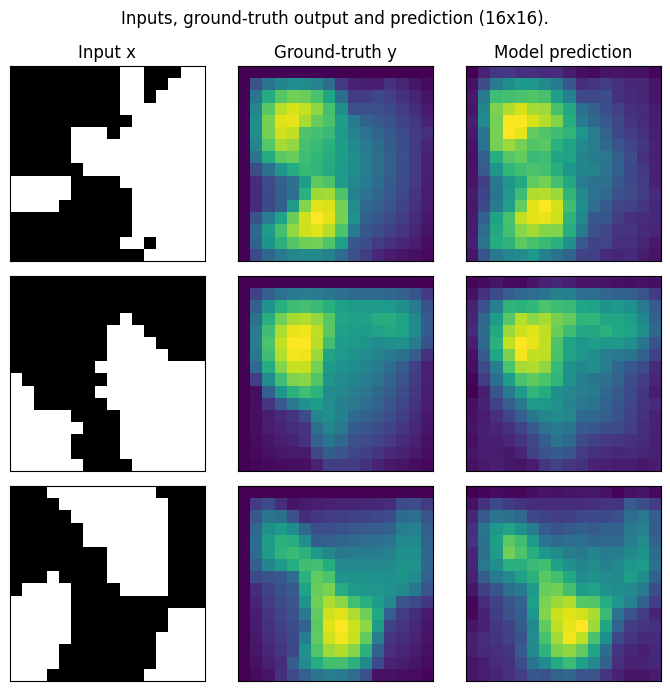

In [4]:
import matplotlib.pyplot as plt

test_samples = test_loaders[16].dataset

fig = plt.figure(figsize=(7, 7))
for index in range(3):
    data = test_samples[index]
    data = data_processor.preprocess(data, batched=False)
    # Input x
    x = data['x']
    # Ground-truth
    y = data['y']
    # Model prediction
    out = model(x.unsqueeze(0))

    ax = fig.add_subplot(3, 3, index*3 + 1)
    ax.imshow(x[0], cmap='gray')
    if index == 0:
        ax.set_title('Input x')
    plt.xticks([], [])
    plt.yticks([], [])

    ax = fig.add_subplot(3, 3, index*3 + 2)
    ax.imshow(y.squeeze())
    if index == 0:
        ax.set_title('Ground-truth y')
    plt.xticks([], [])
    plt.yticks([], [])

    ax = fig.add_subplot(3, 3, index*3 + 3)
    ax.imshow(out.squeeze().detach().numpy())
    if index == 0:
        ax.set_title('Model prediction')
    plt.xticks([], [])
    plt.yticks([], [])

fig.suptitle('Inputs, ground-truth output and prediction (16x16).', y=0.98)
plt.tight_layout()
fig.show()

/var/folders/qb/3cvhmjqj30q18hw487v4s64r0000gn/T/ipykernel_16190/845542455.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


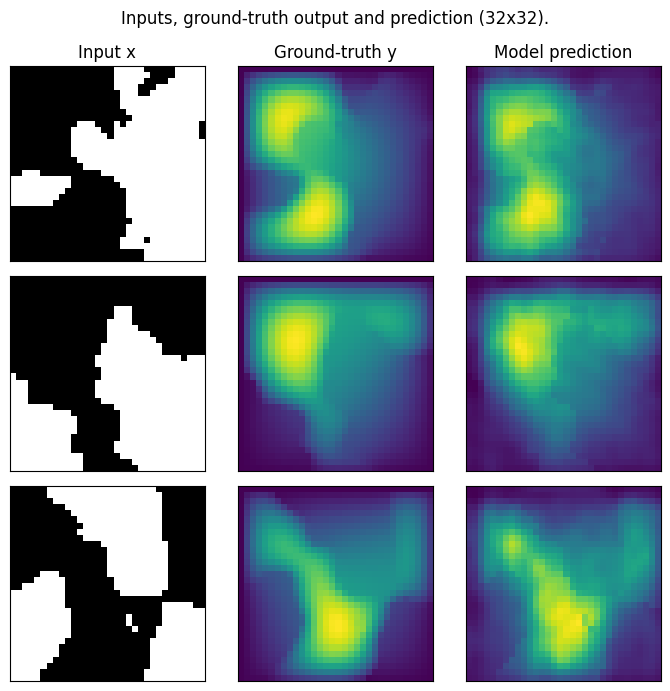

In [5]:
test_samples = test_loaders[32].dataset

fig = plt.figure(figsize=(7, 7))
for index in range(3):
    data = test_samples[index]
    data = data_processor.preprocess(data, batched=False)
    # Input x
    x = data['x']
    # Ground-truth
    y = data['y']
    # Model prediction
    out = model(x.unsqueeze(0))

    ax = fig.add_subplot(3, 3, index*3 + 1)
    ax.imshow(x[0], cmap='gray')
    if index == 0:
        ax.set_title('Input x')
    plt.xticks([], [])
    plt.yticks([], [])

    ax = fig.add_subplot(3, 3, index*3 + 2)
    ax.imshow(y.squeeze())
    if index == 0:
        ax.set_title('Ground-truth y')
    plt.xticks([], [])
    plt.yticks([], [])

    ax = fig.add_subplot(3, 3, index*3 + 3)
    ax.imshow(out.squeeze().detach().numpy())
    if index == 0:
        ax.set_title('Model prediction')
    plt.xticks([], [])
    plt.yticks([], [])

fig.suptitle('Inputs, ground-truth output and prediction (32x32).', y=0.98)
plt.tight_layout()
fig.show()